In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats  


In [182]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20
sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set_context("paper", font_scale=2)    

sb.set_style(style='white') 

In [3]:
dfnames = ['stats_configid=0.0_fact=0.0_0.1_0.2_0.4_0.6_0.8_1.0_2021-07-01 21:04:56_final.csv', 'stats_configid=0.0_fact=0.0_0.1_0.2_0.4_0.6_0.8_1.0_2021-07-01 21:28:15_final.csv', 'stats_configid=0.0_fact=0.0_0.1_0.2_0.4_0.6_0.8_1.0_2021-07-01 21:57:33_final.csv']

In [4]:
# names for datasets with different population size
dfnames = {
    
    1:['stats_configid=0.0_popsz=1_time=2021-07-05 18:37:09_final.csv',
    'stats_configid=0.0_popsz=1_time=2021-07-05 18:55:19_final.csv',
    'stats_configid=0.0_popsz=1_time=2021-07-05 19:17:29_final.csv'],

    2:['stats_configid=0.0_popsz=2_time=2021-07-05 17:42:48_final.csv',
    'stats_configid=0.0_popsz=2_time=2021-07-05 17:58:51_final.csv',
    'stats_configid=0.0_popsz=2_time=2021-07-05 18:17:02_final.csv'],
    
    5:['stats_configid=0.0_popsz=5_time=2021-07-05 16:50:31_final.csv',
    'stats_configid=0.0_popsz=5_time=2021-07-05 17:06:11_final.csv',
    'stats_configid=0.0_popsz=5_time=2021-07-05 17:19:53_final.csv'],

    10:['stats_configid=0.0_popsz=10_time=2021-07-05 19:33:52_final.csv',
    'stats_configid=0.0_popsz=10_time=2021-07-05 19:47:55_final.csv',
    'stats_configid=0.0_popsz=10_time=2021-07-05 20:04:56_final.csv']
}

In [5]:
# read all values into one big table
dflst = []

for key, value in dfnames.items():
    ctr = 0
    for name in value:
        tmp = pd.read_csv(name, delimiter=',')
        tmp['popsize'] = key
        tmp.loc[:, "trial"] = tmp["trial"].apply(lambda x: x + ctr*5)
        dflst.append(tmp)
        ctr+=1
df = pd.concat(dflst, ignore_index=True)
df.describe()

,id,time,strategy,x,y,inh,config,trial,barrier,popsize
count,112563.000000,112563.000000,112563.000000,112563.000000,112563.000000,112563.000000,112563.0,112563.000000,112563.000000,112563.000000
mean,4833.434139,196.121496,1.476444,19.263973,37.674467,0.358355,0.0,6.700585,0.252872,4.100610
std,2949.720951,208.981370,0.502692,2.907487,3.165115,0.338979,0.0,4.365275,0.434660,3.432238
min,0.000000,0.000000,0.000000,8.292768,30.877987,0.000000,0.0,0.000000,0.000000,1.000000
25%,2345.000000,67.000000,1.000000,17.753422,34.459476,0.100000,0.0,3.000000,0.000000,1.000000
50%,4690.000000,134.000000,1.000000,20.689203,37.374847,0.200000,0.0,6.000000,0.000000,2.000000
75%,7067.000000,228.000000,2.000000,20.976757,40.763878,0.600000,0.0,10.000000,1.000000,5.000000
max,12727.000000,1200.000000,2.000000,24.242893,45.689465,1.000000,0.0,14.000000,1.000000,10.000000


In [45]:
# read csvs
dflst = []
ctr = 0
for name in dfnames:
    tmp = pd.read_csv(name, delimiter=',')
    tmp.loc[:, "trial"] = tmp["trial"].apply(lambda x: x + ctr*5)
    dflst.append(tmp)
    ctr+=1
df = pd.concat(dflst, ignore_index=True)

0.8460779330634202 0 40.13963751773512


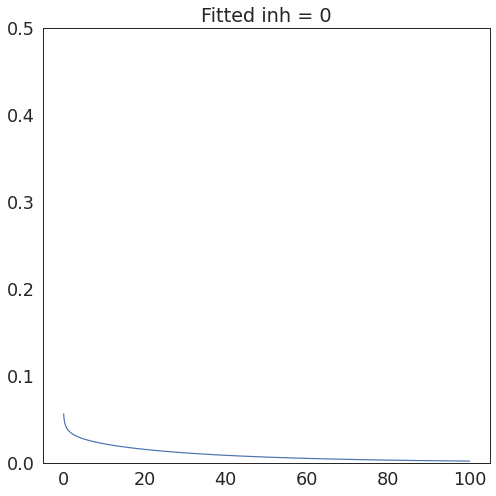

In [31]:
x = np.linspace(0,100,1000)

# Gamma
gamdat = df[df['inh']==1]['time']
#df2.loc[:, "trial"] = df2["trial"].apply(lambda x: x + 5)
gamdat = gamdat.apply(lambda x: x/10.0)
gamdat[gamdat == 0] = 0.01
shape, loc, scale = stats.gamma.fit(gamdat, floc=0)
print(shape, loc, scale)
y = stats.gamma.pdf(x, shape, loc, scale)
plt.title('Fitted inh = 0')
plt.ylim(0, 0.5)
plt.plot(x, y)
#plt.show()

In [25]:
gamdat

3254       0.01
3255       1.00
3256       2.00
3257       3.00
3258       4.00
          ...  
28787    212.00
28788    213.00
28789    214.00
28790    215.00
28791    216.00
Name: time, Length: 5186, dtype: float64

In [45]:
# load csv
#df1 = pd.read_csv("stats_configid=0.0_fact=0_2_2021-06-30 15:14:55_final.csv", delimiter=',')
#df2 = pd.read_csv("stats_configid=0.0_fact=4_6_2021-06-30 15:41:35_final.csv", delimiter=',')
#df3 = pd.read_csv("stats_configid=0.0_fact=8_10_2021-06-30 16:09:07_final.csv", delimiter=',')

df1 = pd.read_csv("stats_configid=0.0_fact=1_2_2021-06-30 19:47:43_final.csv", delimiter=',')
df2 = pd.read_csv("stats_configid=0.0_fact=4_6_2021-06-30 19:58:58_final.csv", delimiter=',')
df3 = pd.read_csv("stats_configid=0.0_fact=8_10_2021-06-30 20:05:11_final.csv", delimiter=',')
df = pd.concat([df1, df2, df3], ignore_index=True)

In [106]:
df1 = pd.read_csv("stats_configid=0.0_fact=0.0_0.1_0.2_0.4_0.6_0.8_1.0_2021-06-30 20:51:12_final.csv", delimiter=',')
df2 = pd.read_csv("stats_configid=0.0_fact=0.0_0.1_0.2_0.4_0.6_0.8_1.0_2021-06-30 21:17:36_final.csv", delimiter=',')
df2.loc[:, "trial"] = df2["trial"].apply(lambda x: x + 5)

df = pd.concat([df1,df2], ignore_index=True)
# TODO change df2 trial to 


,id,time,strategy,x,y,inh,config,trial,barrier
0,0,0,0,24.000000,39.600000,0.0,0.0,0,0
1,1,1,0,24.000000,39.600000,0.0,0.0,0,0
2,2,2,0,24.000000,39.600000,0.0,0.0,0,0
3,3,3,0,24.000000,39.600000,0.0,0.0,0,0
4,4,4,1,23.078000,39.608670,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
18216,6610,164,2,16.376047,36.037884,1.0,0.0,9,0
18217,6611,165,2,16.376047,36.037884,1.0,0.0,9,0
18218,6612,166,2,16.355412,36.077652,1.0,0.0,9,0
18219,6613,167,2,16.355412,36.077652,1.0,0.0,9,0


In [35]:
# extract total time
def extract_time_to_target(df, factors, maxtime):
    timing = []
    ctr = 0
    for f in factors:
        for t in range(maxtime):
            tmp = df.query('trial=='+str(t)+' and inh==' + str(f))
            trialdict = {'id':ctr, 'time':tmp['time'].max(), 'trial':t, 'inh':f}
            timing.append(trialdict)
            ctr+=1
    return timing

In [36]:
time_to_target = pd.DataFrame(extract_time_to_target(df=df, factors=[1,2,4, 6, 8, 10], maxtime=5))
#time_to_target = time_to_target.drop(index=29)
#time_to_target

In [60]:
time_to_target = pd.DataFrame(extract_time_to_target(df=df, factors=[0.0,0.1,0.2,0.4, 0.6, 0.8, 1.0], maxtime=14))

No handles with labels found to put in legend.


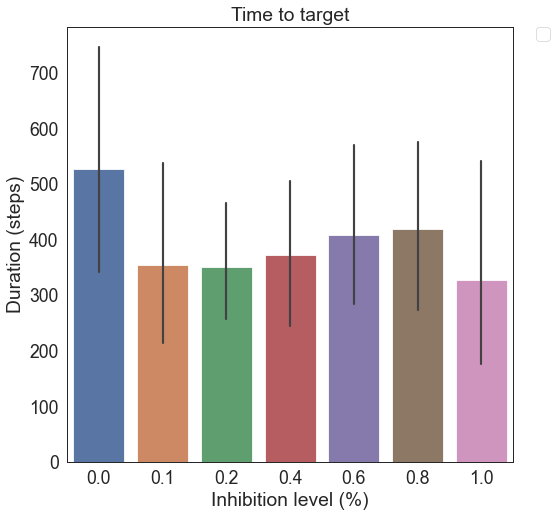

In [160]:
tttbarplot = sb.barplot(x='inh', y='time', data=time_to_target)
tttbarplot.set_title("Time to target")
tttbarplot.set(ylabel='Duration (steps)',xlabel='Inhibition level (%)')
tttbarplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

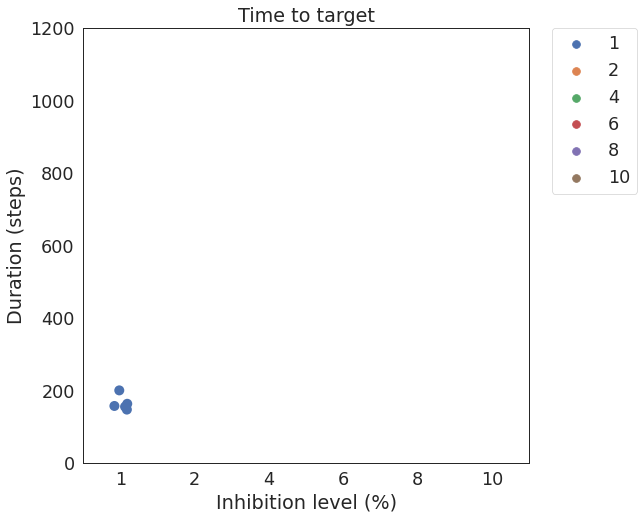

In [38]:
#sb.set(rc={'figure.figsize':(12,8)})
stripplt = sb.stripplot(x='inh', y='time', hue='inh', data=time_to_target, size=10) #, width=1)

stripplt.set_title("Time to target")
stripplt.set(ylabel='Duration (steps)',xlabel='Inhibition level (%)')
plt.ylim((0, 1200))
stripplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
# extract total time
def extract_barrier_time(df, factors, maxtime):
    timing = []
    ctr = 0
    for f in factors:
        for t in range(maxtime):
            tmp = df.query('trial=='+str(t)+' and inh==' + str(f) + 'and barrier==1')
            trialdict = {'id':ctr, 'time':tmp['time'].max() - tmp['time'].min(), 'trial':t, 'inh':f, 'popsize':tmp['popsize']}
            timing.append(trialdict)
            ctr+=1
    return timing

In [19]:
# extract total time
def extract_barrier_time_pops(df, factors, maxtime):
    timing = []
    ctr = 0
    for s in [1,2,5,10]:
        for f in factors:
            for t in range(maxtime):
                tmp = df.query('trial=='+str(t)+' and inh==' + str(f) + 'and barrier==1' + 'and popsize=='+str(s))
                trialdict = {'id':ctr, 'time':tmp['time'].max() - tmp['time'].min(), 'trial':t, 'inh':f, 'popsize':s}
                timing.append(trialdict)
                ctr+=1
    return timing

In [151]:
# extract mean and sd for inh and popsize
def calc_summary_barrier(df, sizes, factors):
    summary = []
    ctr = 0
    for s in sizes:
        for f in factors:
            tmp = df.query('popsize=='+str(s) + ' and inh==' + str(f))
            mn = tmp['time'].mean()
            std = tmp['time'].std()
            sessiondict = {'id':ctr, 'mean':mn, 'std':std, 'popsize':s, 'inh':f}
            summary.append(sessiondict)
            ctr+=1
    return summary


In [46]:
time_in_barrier = pd.DataFrame(extract_barrier_time(df=df, factors=[1,2,4,6,8,10], maxtime=14))
#time_in_barrier = time_in_barrier.drop(index=29)

In [66]:
time_in_barrier.loc[:, 'time'] = time_in_barrier['time'].apply(lambda x: x/10.0)

In [91]:

time_in_barrier_pops = pd.DataFrame(extract_barrier_time_pops(df=df, factors=[0.0,0.1,0.2,0.4, 0.6, 0.8, 1.0], maxtime=14))

In [155]:
barrier_summary = pd.DataFrame(calc_summary_barrier(df=time_in_barrier_pops, sizes=[1,2,5,10], factors=[0.0,0.1,0.2,0.4, 0.6, 0.8, 1.0]))
barrier_summary

,id,mean,std,popsize,inh
0,0,26.385714,31.030775,1,0.0
1,1,11.435714,7.818480,1,0.1
2,2,15.585714,19.950973,1,0.2
3,3,10.357143,8.342543,1,0.4
4,4,5.823077,1.485572,1,0.6
5,5,5.766667,3.880800,1,0.8
6,6,5.284615,2.193493,1,1.0
7,7,15.164286,17.910358,2,0.0
8,8,6.650000,3.210979,2,0.1
9,9,11.035714,20.323598,2,0.2


In [163]:
allspecies = pd.read_csv('allspecies.csv')

In [165]:
allspecies


,Unnamed: 0,time,species,measure
0,0,257.00,g,NaN
1,1,313.00,g,NaN
2,2,29.00,g,NaN
3,3,416.00,g,NaN
4,4,399.00,g,NaN
...,...,...,...,...
226,226,1.36,m,NaN
227,227,0.56,m,NaN
228,228,0.88,m,NaN
229,229,1.04,m,NaN


In [173]:
allspecies[allspecies['species']=='g']

,Unnamed: 0,time,species,measure
0,0,257.0,g,NaN
1,1,313.0,g,NaN
2,2,29.0,g,NaN
3,3,416.0,g,NaN
4,4,399.0,g,NaN
...,...,...,...,...
187,187,19.0,g,NaN
188,188,14.0,g,NaN
189,189,127.0,g,NaN
190,190,81.0,g,NaN


In [176]:
# calc mean and std
specsummary = []
for s in ['g', 'd', 'w', 'm']:
    tmp = allspecies.query('species=="'+str(s)+'"')
    mn = tmp['time'].mean()
    std = tmp['time'].std()
    sessiondict = {'id':ctr, 'mean':mn, 'std':std, 'species':s}
    specsummary.append(sessiondict)
    ctr+=1
specsum = pd.DataFrame(specsummary)

In [249]:
sz = [x for x in np.arange(5,20,(15.0/4))]

pop = [1,2,5,10]
dct = dict(zip(pop, sz))
dct

{1: 5.0, 2: 8.75, 5: 12.5, 10: 16.25}

In [277]:
#pal = sb.color_palette()
inh_pal = sb.cubehelix_palette(as_cmap=False)
inh_paldct = dict(zip([0, 0.1,0.2,0.4,0.8,1.0], range(6)))
inh_paldct
inh_pal

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8559578605899612, 0.6418993116910497, 0.6754191211563135],
 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
 [0.57916573903086, 0.33934576125314425, 0.5219003947563425],
 [0.37894937987024996, 0.2224702044652721, 0.41140014301575434],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [278]:
spec_pal = sb.color_palette()
spec_paldct = dict(zip(['Guppy', 'Dog', 'Wolf', 'Mouse'], range(5)))
spec_paldct
spec_pal

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

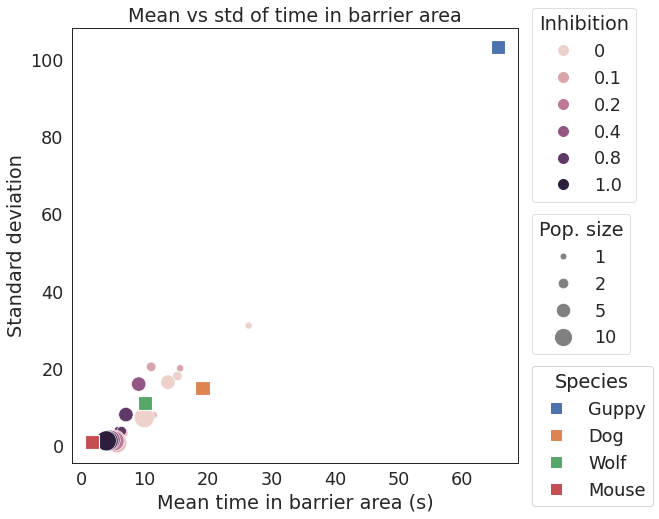

In [292]:
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots()
a = sb.scatterplot(x='mean', y='std', data=barrier_summary, hue='inh', size='popsize', sizes=(50,400), label=None)
b = sb.scatterplot(x='mean', y='std', data=specsum, hue='species', marker = 's', s=200, label=None)
b.set(ylabel='Standard deviation',xlabel='Mean time in barrier area (s)')
b.legend_.remove()
##plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Test')
plt.title('Mean vs std of time in barrier area')
# leg = plt.legend(loc=(1.03,0), title="Year")
# ax.add_artist(leg)


ha = [plt.plot([],[], color="gray",   marker="o", ms=dct[i], ls="")[0] for i in [1,2,5,10]]
la = plt.legend(handles=ha, labels=[1,2,5,10],loc=(1.03,0.25), title="Pop. size")

hb= [plt.plot([],[], color=inh_pal[inh_paldct[i]],   marker="o", ms=10, ls="")[0] for i in [0, 0.1,0.2,0.4,0.8,1.0]]
lb = plt.legend(handles=hb, labels=[0, 0.1,0.2,0.4,0.8,1.0],loc=(1.03,0.6), title="Inhibition")

hc= [plt.plot([],[], color=spec_pal[spec_paldct[i]],   marker="s", ms=10, ls="")[0] for i in ['Guppy', 'Dog', 'Wolf', 'Mouse']]
lc = plt.legend(handles=hc, labels=['Guppy', 'Dog', 'Wolf', 'Mouse'],loc=(1.03,-0.1), title="Species")

ax.add_artist(la)
ax.add_artist(lb)
ax.add_artist(lc)
fig.savefig("mean_vs_std_time_in_barrier.png", bbox_inches='tight')

In [92]:
time_in_barrier_pops.loc[:, 'time'] = time_in_barrier_pops['time'].apply(lambda x: x/10.0)

No handles with labels found to put in legend.


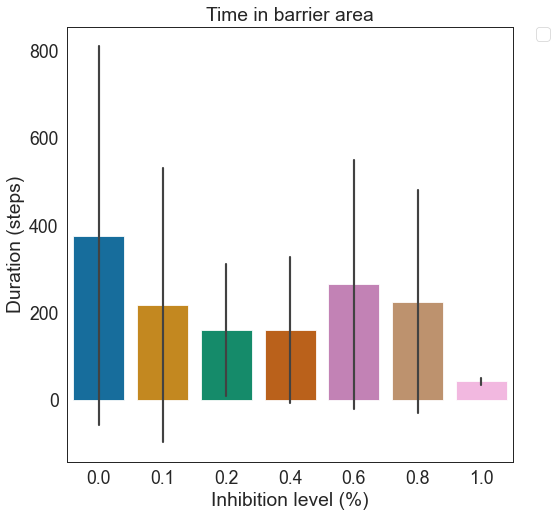

In [164]:
barplt = sb.barplot(x='inh', y='time', data=time_in_barrier, palette="colorblind", ci='sd')
barplt.set_title("Time in barrier area")
barplt.set(ylabel='Duration (steps)',xlabel='Inhibition level (%)')
barplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


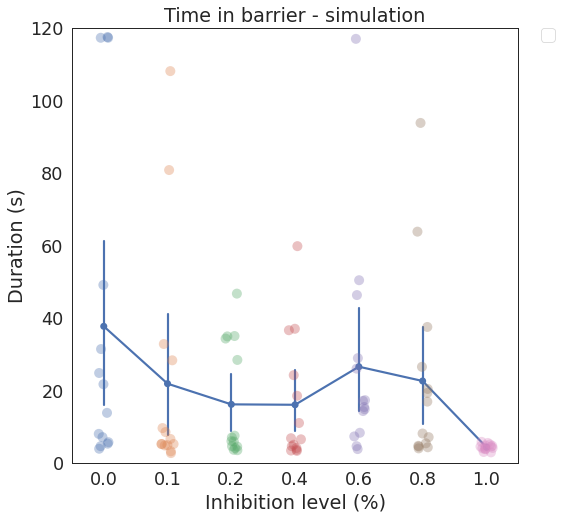

In [70]:

#sb.set(rc={'figure.figsize':(6,4)})
# tmp.loc[:, "trial"] = tmp["trial"].apply(lambda x: x + ctr*5)

barrierpl = sb.stripplot(x='inh', y='time', data=time_in_barrier, size=10,alpha=0.35) #, width=1)
barrierpl = sb.pointplot(x='inh', y='time', data=time_in_barrier, size=10, join=True) #, width=1)

plt.ylim((0, 120))
barrierpl.set_title("Time in barrier - simulation")
barrierpl.set(ylabel='Duration (s)',xlabel='Inhibition level (%)')
barrierpl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
barrierpl.figure.savefig("simulation_time_in_barrier.png")

In [25]:
time_in_barrier_pops

,id,time,trial,inh,popsize
0,0,523.0,0,0.0,1
1,1,84.0,1,0.0,1
2,2,182.0,2,0.0,1
3,3,76.0,3,0.0,1
4,4,741.0,4,0.0,1
...,...,...,...,...,...
387,387,29.0,9,1.0,10
388,388,40.0,10,1.0,10
389,389,47.0,11,1.0,10
390,390,27.0,12,1.0,10


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


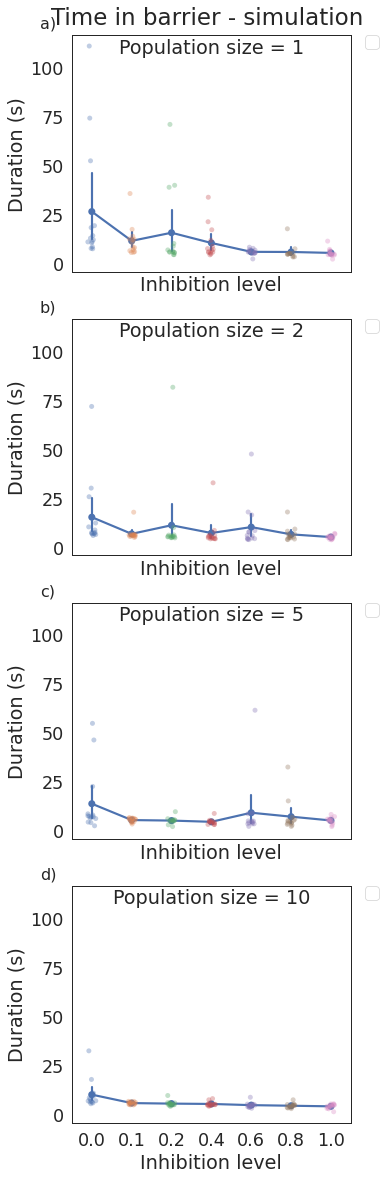

In [144]:
fig, axes = plt.subplots(4, 1, figsize=(5, 20), sharey=True, sharex=True)
fig.suptitle('Time in barrier - simulation', y=0.9)
pops = [1,2,5,10]
abc = ['a)', 'b)', 'c)', 'd)']
for i in range(4):
    barrierpl = sb.pointplot(ax=axes[i], x='inh', y='time', data=time_in_barrier_pops[time_in_barrier_pops['popsize']==pops[i]])
    barrierpl = sb.stripplot(ax=axes[i], x='inh', y='time', data=time_in_barrier_pops[time_in_barrier_pops['popsize']==pops[i]], alpha=0.35)
    barrierpl.set(ylabel='Duration (s)',xlabel='Inhibition level')
    barrierpl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes[i].set_title("Population size = " + str(pops[i]), y=0.9)
    axes[i].text(x=-1.3, y=120, s=abc[i], fontsize=16) 
#fig.savefig("simulation_time_in_barrier_population.png")

In [ ]:
tmp = time_in_barrier[time_in_barrier['inh']==1]
tmp['time'].hist()

In [15]:
time_to_target.query('inh==4')['time'].describe()

count       5.0000
mean     1113.2000
std       194.0907
min       766.0000
25%      1200.0000
50%      1200.0000
75%      1200.0000
max      1200.0000
Name: time, dtype: float64

(0.0, 1200.0)

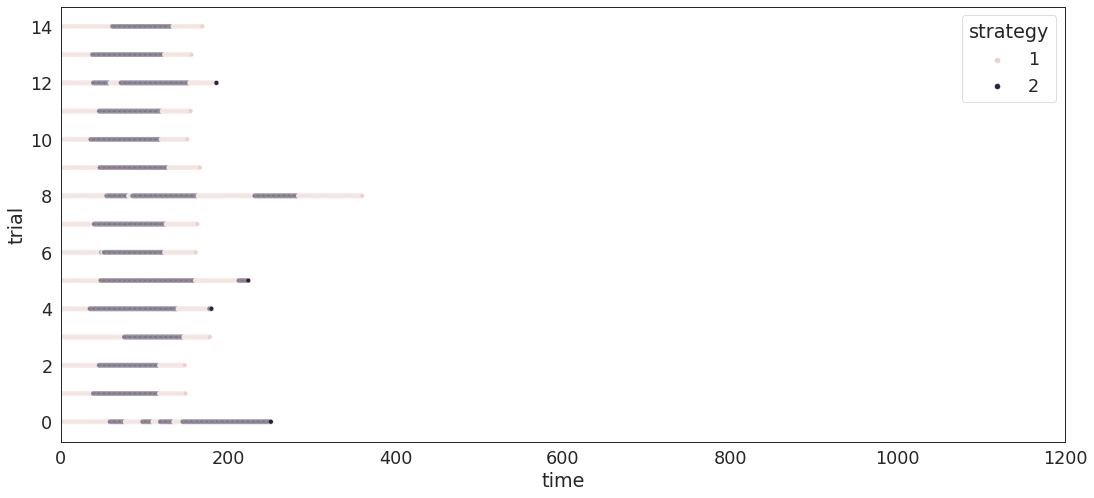

In [136]:
# plot temporal 
tmp = df.query('inh==' + str(1) + ' and popsize==1')
stratplt = sb.scatterplot(x='time', y='trial', hue='strategy', data=tmp)
plt.xlim((0,1200))

In [ ]:
# calculate mean and sd for population count and inh level combinations